In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()
sns.set(style='darkgrid')
from matplotlib import pyplot as plt
import plotly.graph_objects as go

# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz
# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv
/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetXLS.xlsx
/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv


In [2]:
# Read the Indian Food 101 Dataset
df_101 = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
# Display Top 5 rows
df_101.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
# Read 6000 Indian Food Recipes Dataset
df_6000 = pd.read_csv('/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv')
# Display top 5 rows
df_6000.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [3]:
# Total number of recipes by state from Indian Food 101 dataset
df_101.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Manipur             2
Madhya Pradesh      2
Haryana             1
Tripura             1
Uttarakhand         1
Chhattisgarh        1
Nagaland            1
NCT of Delhi        1
Name: state, dtype: int64

In [5]:
#Extract recipes that are related to Tamilnadu
df_tn = df_101[df_101['state'] == 'Tamil Nadu']
df_tn


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
49,Pongal,"Rice, jaggery, cashews, ghee",vegetarian,5,20,sweet,dessert,Tamil Nadu,South
53,Unni Appam,"Rice flour, banana, jaggery, coconut",vegetarian,10,20,sweet,dessert,Tamil Nadu,South
127,Currivepillai sadam,"Chana dal, urad dal, fresh coconut, sesame see...",vegetarian,10,20,spicy,main course,Tamil Nadu,South
129,Idiappam,"Rice flour, hot water, grated coconut",vegetarian,120,30,spicy,snack,Tamil Nadu,South
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
133,Keerai kootu,"Moong dal, chana dal, spinach, urad dal, cocon...",vegetarian,20,30,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
135,Keerai sadam,"Greens, tomato, mustard seeds, fenugreek seeds",vegetarian,10,20,spicy,main course,Tamil Nadu,South
136,Keerai poriyal,"Amaranth leaves, split urad dal, mustard seeds...",vegetarian,20,30,spicy,main course,Tamil Nadu,South
138,Kootu,"Chana dal, urad dal, potato, beans, peas",vegetarian,10,15,spicy,main course,Tamil Nadu,South


In [7]:
possibilities1 = process.extract("sadam", df_6000['TranslatedRecipeName'], limit=20, scorer=fuzz.partial_ratio)

In [8]:
# Get matches with partial ratio as 100
# Partial rtaio compare subsections of the string
extracted_matches1 = [possible for possible in possibilities1 if possible[1] == 100]
extracted_matches1

[('Thengai Sadam Recipe (A Quick and Healthy Coconut Rice)', 100, 74),
 ('Chettinad Thakkali Sadam Recipe (Chettinad Style Tomato Rice)', 100, 178),
 ('Thalicha Thayir Sadam Recipe - Spicy Seasoned Curd Rice', 100, 531),
 (' Chettinad Takkali Sadam Recipe', 100, 692),
 ('Chutney Podi Sadam Recipe - Rice Flavoured With Chutney Podi', 100, 847),
 ('Milagu Jeera Curry Leaf Sadam Recipe', 100, 1438),
 ('One Pot Tomato Rice Recipe Using Preethi Electric Pressure Cooker - Thakkali Sadam',
  100,
  1738),
 ('Kothamalli Karuveppilai Sadam Recipe - Coriander And Curry Leaves Rice',
  100,
  1814),
 (' Milagu Sadam (Recipe In Hindi)', 100, 2695),
 ('Ellu Sadam Recipe - South Indian Style Til Pulao Recipe', 100, 3020),
 ('Carrots Dill and Peanut Sadam - South Indian Style Stir Fried Rice',
  100,
  3041),
 ('Milagu Sadam Recipe (Instant Pepper Rice)', 100, 3131),
 (' Ellu Sadam (Recipe In Hindi)', 100, 3799),
 ('Ellu Sadam Recipe - Sesame Rice', 100, 4272),
 ('Milagu Jeera Sadam Recipe - Milagu J

In [9]:
# Extract only the recipe name from the result
get_recipe_name = [extracted_matches1[i][0] for i in range(len(extracted_matches1))]

In [10]:
# Get recipes of the extracted matches
df_updated = df_6000[df_6000['TranslatedRecipeName'].isin(get_recipe_name)]

# Select meal based on prep time

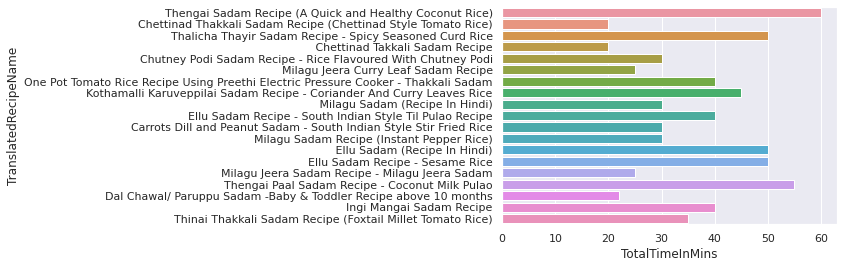

In [11]:
a=sns.barplot(y='TranslatedRecipeName',x='TotalTimeInMins',data=df_updated)

In [12]:
print("What's the time you can wait before eating?")
print("1.Fast and Delicious\n\n2.I live for food\n\nEnter the number")
x=int(input())
if x==1:
    print(df_updated['TranslatedRecipeName'][df_updated[df_updated['TotalTimeInMins'] <= 40].index.tolist()].tolist())
else:
    print(df_updated['TranslatedRecipeName'][df_updated[df_updated['TotalTimeInMins'] > 40].index.tolist()].tolist())

What's the time you can wait before eating?
1.Fast and Delicious

2.I live for food

Enter the number


 2


['Thengai Sadam Recipe (A Quick and Healthy Coconut Rice)', 'Thalicha Thayir Sadam Recipe - Spicy Seasoned Curd Rice', 'Kothamalli Karuveppilai Sadam Recipe - Coriander And Curry Leaves Rice', ' Ellu Sadam (Recipe In Hindi)', 'Ellu Sadam Recipe - Sesame Rice', 'Thengai Paal Sadam Recipe - Coconut Milk Pulao']


In [13]:
# Explore commonly used ingredient in tamil nadu food
df_tn['ingredients'] = df_tn['ingredients'].str.split(',')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_tn

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
49,Pongal,"[Rice, jaggery, cashews, ghee]",vegetarian,5,20,sweet,dessert,Tamil Nadu,South
53,Unni Appam,"[Rice flour, banana, jaggery, coconut]",vegetarian,10,20,sweet,dessert,Tamil Nadu,South
127,Currivepillai sadam,"[Chana dal, urad dal, fresh coconut, sesame...",vegetarian,10,20,spicy,main course,Tamil Nadu,South
129,Idiappam,"[Rice flour, hot water, grated coconut]",vegetarian,120,30,spicy,snack,Tamil Nadu,South
132,Kaara kozhambu,"[Sesame oil, drumstick, tamarind paste, sam...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
133,Keerai kootu,"[Moong dal, chana dal, spinach, urad dal, ...",vegetarian,20,30,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"[Urad dal, curry leaves, sugar, mustard see...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
135,Keerai sadam,"[Greens, tomato, mustard seeds, fenugreek s...",vegetarian,10,20,spicy,main course,Tamil Nadu,South
136,Keerai poriyal,"[Amaranth leaves, split urad dal, mustard se...",vegetarian,20,30,spicy,main course,Tamil Nadu,South
138,Kootu,"[Chana dal, urad dal, potato, beans, peas]",vegetarian,10,15,spicy,main course,Tamil Nadu,South


In [15]:
df_101['state'].unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [16]:
# Get unique ingredients with count
plt.figure(figsize=(15,16))
def get_unique_ingredients(state):
    df_unique = df_101[df_101['state'] == state]
    df_unique['ingredients'] = df_unique['ingredients'].str.split(',')
    print(df_unique['ingredients'].explode().unique())
    fig = go.Figure(data=[go.Pie(labels=df_unique['ingredients'].explode().unique(), values=df_unique['ingredients'].explode().value_counts())])
    fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
    fig.show()
    
get_unique_ingredients('Tamil Nadu')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['Rice' ' jaggery' ' cashews' ' ghee' 'Rice flour' ' banana' ' coconut'
 'Chana dal' ' urad dal' ' fresh coconut' ' sesame seeds' ' curry leaves'
 ' hot water' ' grated coconut' 'Sesame oil' ' drumstick'
 ' tamarind paste' ' sambar powder' ' tomato' 'Moong dal' ' chana dal'
 ' spinach' ' coconut oil' 'Urad dal' ' sugar' ' mustard seeds' 'Greens'
 ' fenugreek seeds' 'Amaranth leaves' ' split urad dal' ' red chili'
 ' potato' ' beans' ' peas' ' cabbage' ' tamarind' ' gooseberry'
 ' raw rice' 'Pearl onions' ' drumsticks' 'Yogurt' ' ginger'
 ' baking soda' ' green chilli' 'Arhar dal' ' fennel seeds' ' mustard'
 ' lemon' ' cooked rice' ' curd' ' sesame oil' 'Meat curry powder'
 ' chicken chunks' ' cinnamon']


<Figure size 1080x1152 with 0 Axes>

In [17]:
 #Extract only recipes belong to West Bengal
df_wb = df_101[df_101['state'] == 'West Bengal']
df_wb

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
23,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coc...",vegetarian,40,60,sweet,dessert,West Bengal,East
25,Ledikeni,"Chhena, sugar, ghee",vegetarian,45,45,sweet,dessert,West Bengal,East
28,Mihidana,"Besan flour, sugar, ghee",vegetarian,15,30,sweet,dessert,West Bengal,East
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
30,Pantua,"Chhena, sugar, ghee, flour",vegetarian,45,45,sweet,dessert,West Bengal,East
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60,sweet,dessert,West Bengal,East


In [18]:
possibilities = process.extract("curry", df_6000['TranslatedRecipeName'], limit=20, scorer=fuzz.partial_ratio)

In [19]:
extracted_matches = [possible for possible in possibilities if possible[1] == 100]
extracted_matches

[('Gongura Chicken Curry Recipe - Andhra Style Gongura Chicken', 100, 3),
 ('Udupi Style Ash Gourd Coconut Curry Recipe', 100, 6),
 ('Saunf Aloo (Fennel Potato Curry) Recipe', 100, 14),
 ('Hariyali Egg Curry Recipe In Coriander and Mint Gravy', 100, 16),
 ('Mini Dal Samosa Curry / Sabzi Recipe', 100, 26),
 ('Palakottai Kujambu Recipe-Kongunad Style Jackfruit Seeds Curry', 100, 38),
 ('Iranian Baida Curry Recipe', 100, 62),
 ('Dubuk Vade Recipe - Khandeshi Gram Flour Dumpling Curry', 100, 69),
 ('Matar Paneer Kachori Korma Recipe - Green Peas And Paneer Kachori Curry',
  100,
  72),
 ('Karwar Style Ambade Udid Methi Recipe - Hog Plum Curry', 100, 75),
 ('White Pumpkin Mor Kuzhambu Recipe - Kerala Style White Pumpkin Curry',
  100,
  82),
 ('Kerala Style Raw Banana and Suran Kotu Curry Recipe - Kerala Style Plantain & Yam Thoran Recipe',
  100,
  104),
 ('One Pot Pressure Cooker Chicken Curry Recipe - One Pot Pressure Cooker Chicken Curry Recipe',
  100,
  118),
 ('And fish soup recipe -

In [20]:
get_recipe_name = [extracted_matches[i][0] for i in range(len(extracted_matches))]

In [21]:
df_updated = df_6000[df_6000['TranslatedRecipeName'].isin(get_recipe_name)]

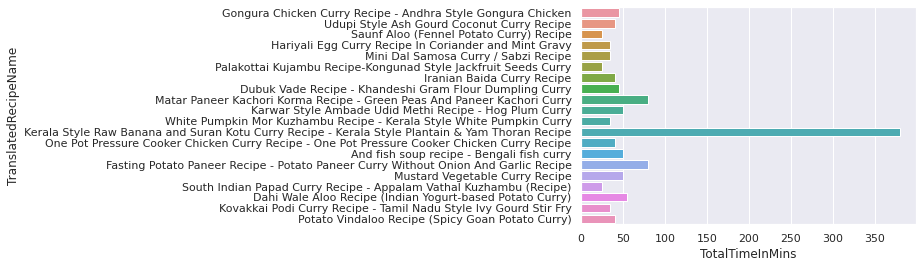

In [22]:
a=sns.barplot(y='TranslatedRecipeName',x='TotalTimeInMins',data=df_updated)

In [23]:
print("What's the time you can wait before eating?")
print("1.Fast and Delicious\n\n2.I live for food\n\nEnter the number")
x=int(input())
if x==1:
    print(df_updated['TranslatedRecipeName'][df_updated[df_updated['TotalTimeInMins'] <= 40].index.tolist()].tolist())
else:
    print(df_updated['TranslatedRecipeName'][df_updated[df_updated['TotalTimeInMins'] > 40].index.tolist()].tolist())



What's the time you can wait before eating?
1.Fast and Delicious

2.I live for food

Enter the number


 2


['Gongura Chicken Curry Recipe - Andhra Style Gongura Chicken', 'Dubuk Vade Recipe - Khandeshi Gram Flour Dumpling Curry', 'Matar Paneer Kachori Korma Recipe - Green Peas And Paneer Kachori Curry', 'Karwar Style Ambade Udid Methi Recipe - Hog Plum Curry', 'Kerala Style Raw Banana and Suran Kotu Curry Recipe - Kerala Style Plantain & Yam Thoran Recipe', 'And fish soup recipe - Bengali fish curry', 'Fasting Potato Paneer Recipe - Potato Paneer Curry Without Onion And Garlic Recipe', 'Mustard Vegetable Curry Recipe', 'Dahi Wale Aloo Recipe (Indian Yogurt-based Potato Curry)', 'Mustard Vegetable Curry Recipe']


In [25]:
df_wb['ingredients'] = df_wb['ingredients'].str.split(',')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_wb

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,NaN,vegetarian,45,25,sweet,dessert,West Bengal,East
4,Gulab jamun,NaN,vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,NaN,vegetarian,10,50,sweet,dessert,West Bengal,East
8,Kalakand,NaN,vegetarian,20,30,sweet,dessert,West Bengal,East
23,Cham cham,NaN,vegetarian,40,60,sweet,dessert,West Bengal,East
25,Ledikeni,NaN,vegetarian,45,45,sweet,dessert,West Bengal,East
28,Mihidana,NaN,vegetarian,15,30,sweet,dessert,West Bengal,East
29,Misti doi,NaN,vegetarian,480,30,sweet,dessert,West Bengal,East
30,Pantua,NaN,vegetarian,45,45,sweet,dessert,West Bengal,East
33,Ras malai,NaN,vegetarian,180,60,sweet,dessert,West Bengal,East


In [27]:
plt.figure(figsize=(15,16))
def get_unique_ingredients(state):
    df_unique = df_101[df_101['state'] == state]
    df_unique['ingredients'] = df_unique['ingredients'].str.split(',')
    print(df_unique['ingredients'].explode().unique())
    fig = go.Figure(data=[go.Pie(labels=df_unique['ingredients'].explode().unique(), values=df_unique['ingredients'].explode().value_counts())])
    fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
    fig.show()
    
get_unique_ingredients('West Bengal')

['Maida flour' ' yogurt' ' oil' ' sugar' 'Milk powder' ' plain flour'
 ' baking powder' ' ghee' ' milk' ' water' ' rose water' 'Sugar syrup'
 ' lentil flour' 'Milk' ' cottage cheese' 'Flour' ' cream' ' saffron'
 ' lemon juice' ' coconut flakes' 'Chhena' 'Besan flour' ' jaggery'
 ' flour' ' reduced milk' ' pistachio' ' cardamom' 'Rice flour'
 ' vegetable oil' ' elachi' 'Chicken' ' dahi' ' sesame seeds'
 ' garam masala powder' ' cashew nuts' 'Moong dal' ' garlic'
 ' green chilli' ' all purpose flour' 'Rice' ' mango' ' curd' 'Maida'
 'Coconut milk' ' lobster' ' fresh green chilli' ' ginger' ' red onion'
 'Baking soda' ' clarified butter' 'Coconut' ' prawns' ' mustard seed'
 ' green chili' 'Fish fillet' ' besan' ' lemon' ' mint' 'Chana dal'
 ' fresh coconut' ' cinnamon' ' raisins' ' turmeric' 'Green beans'
 ' bitter gourd' ' ridge gourd' ' banana' ' brinjal']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1080x1152 with 0 Axes>

In [28]:
import plotly.graph_objs as go

def get_unique_ingredients(state):
    df_unique = df_101[df_101['state'] == state]
    df_unique['ingredients'] = df_unique['ingredients'].str.split(',')
    unique_ingredients = df_unique['ingredients'].explode().unique()
    values = []
    for ingredient in unique_ingredients:
        values.append(df_unique['ingredients'].apply(lambda x: ingredient in x).value_counts()[True])
    fig = go.Figure(data=[go.Bar(x=unique_ingredients, y=values)])
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    
get_unique_ingredients('West Bengal')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

